In [50]:
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from scipy.stats import gaussian_kde
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.textpath import TextToPath
import tilemapbase
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
import adjustText as aT

import seaborn as sns
import shapely.speedups
shapely.speedups.enable()

In [49]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\users\egust\anaconda3\envs\learn-env\lib\site-packages (from matplotlib->adjustText) (2.4.7)

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7104 sha256=f0697fc468780f7db0a5dcfe00e02a796583a7a195fa7f919073f3e9345f9785
  Stored in directory: c:\users\egust\appdata\local\pip\cache\wheels\70\86\f9\89161c891b07f90e2b15b5e4b6dfe70cc8f54c5ef26c0116f1
Successfully built adjustText


In [4]:
kings_county = gpd.read_file('C:/Users/egust/Desktop/KingCounty/School_Districts_in_King_County___schdst_area.shp')
kings_county_schools = gpd.read_file('C:/Users/egust/Desktop/School_Sites_in_King_County___schsite_point.shp')
kings_county_cpi = gpd.read_file('C:/Users/egust/Desktop/Common_Points_of_Interest_for_King_County____common_interest_point.shp')

In [23]:
king_county_cpi = kings_county_cpi.to_crs(epsg=3857)
kings_county = kings_county.to_crs(epsg=3857)
kings_county_schools = kings_county_schools.to_crs(epsg=3857)

In [24]:

t_ = king_county_cpi.loc[king_county_cpi['CODE'] == 500]
t_1 = king_county_cpi.loc[king_county_cpi['CODE'] == 510]
t_2 = king_county_cpi.loc[king_county_cpi['CODE'] == 30]
t_3 = king_county_cpi.loc[king_county_cpi['CODE'] == 570]
Transportation_cpi_KC = pd.concat([t_, t_1, t_2, t_3], axis=0)

m_ = king_county_cpi.loc[king_county_cpi['CODE'] == 330]
m_1 = king_county_cpi.loc[king_county_cpi['CODE'] == 67]
m_2 = king_county_cpi.loc[king_county_cpi['CODE'] == 66]
m_3 = king_county_cpi.loc[king_county_cpi['CODE'] == 65]
medical_cpi_KC = pd.concat([m_, m_1, m_2, m_3], axis=0)

e_ = king_county_cpi.loc[king_county_cpi['CODE'] == 600]
e_1 = king_county_cpi.loc[king_county_cpi['CODE'] == 690]
e_2 = king_county_cpi.loc[king_county_cpi['CODE'] == 240]
e_3 = king_county_cpi.loc[king_county_cpi['CODE'] == 350]
entertainment_cpi_KC = pd.concat([e_, e_1, e_2, e_3], axis=0)

job_cpi_KC = king_county_cpi.loc[king_county_cpi['CODE'] == 420]

king_county_CPI = pd.concat([Transportation_cpi_KC, medical_cpi_KC, entertainment_cpi_KC, job_cpi_KC], axis=0)


In [25]:
king_county_CPI = gpd.sjoin(king_county_CPI, kings_county, how='left')
king_county_CPI = king_county_CPI.dropna(subset=['index_right'])

In [ ]:
kings_county['center'] = kings_county['geometry'].centroid
kings_county_points = kings_county.copy()
kings_county_points.set_geometry('center', inplace=True)

1

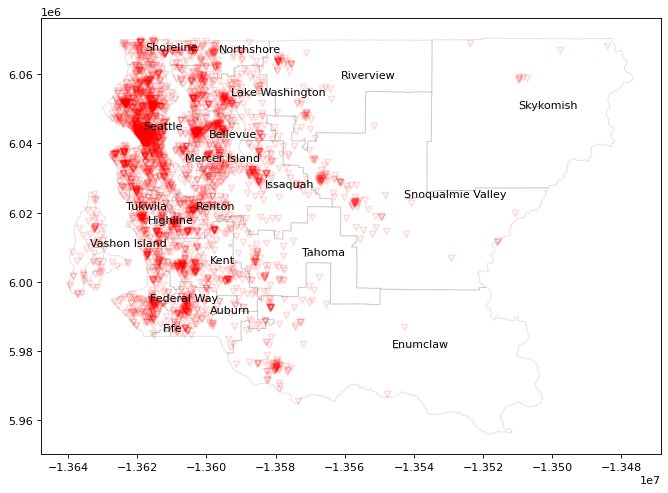

In [73]:
# edit the figure size 

plt.figure(num=None, figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')

# create plot and axes

fig = plt.plot()
ax1 = plt.axes()


# these values can be changed as needed, the markers are LaTeX symbols

kings_county.plot(ax=ax1, alpha=0.1, edgecolor="black", facecolor="white")
king_county_CPI.plot(ax=ax1, alpha = 0.1, color="red", marker='$\\bigtriangledown$')

text = []

for x, y, label in zip(kings_county_points.geometry.x, kings_county_points.geometry.y, kings_county_points['NAME']):
    text.append(plt.text(x, y, label, fontsize = 10))
    
aT.adjust_text(text, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))


In [19]:
bounding_box = [king_county_CPI["geometry"].x.min(), king_county_CPI["geometry"].x.max(), king_county_CPI["geometry"].y.min(), king_county_CPI["geometry"].y.max()]

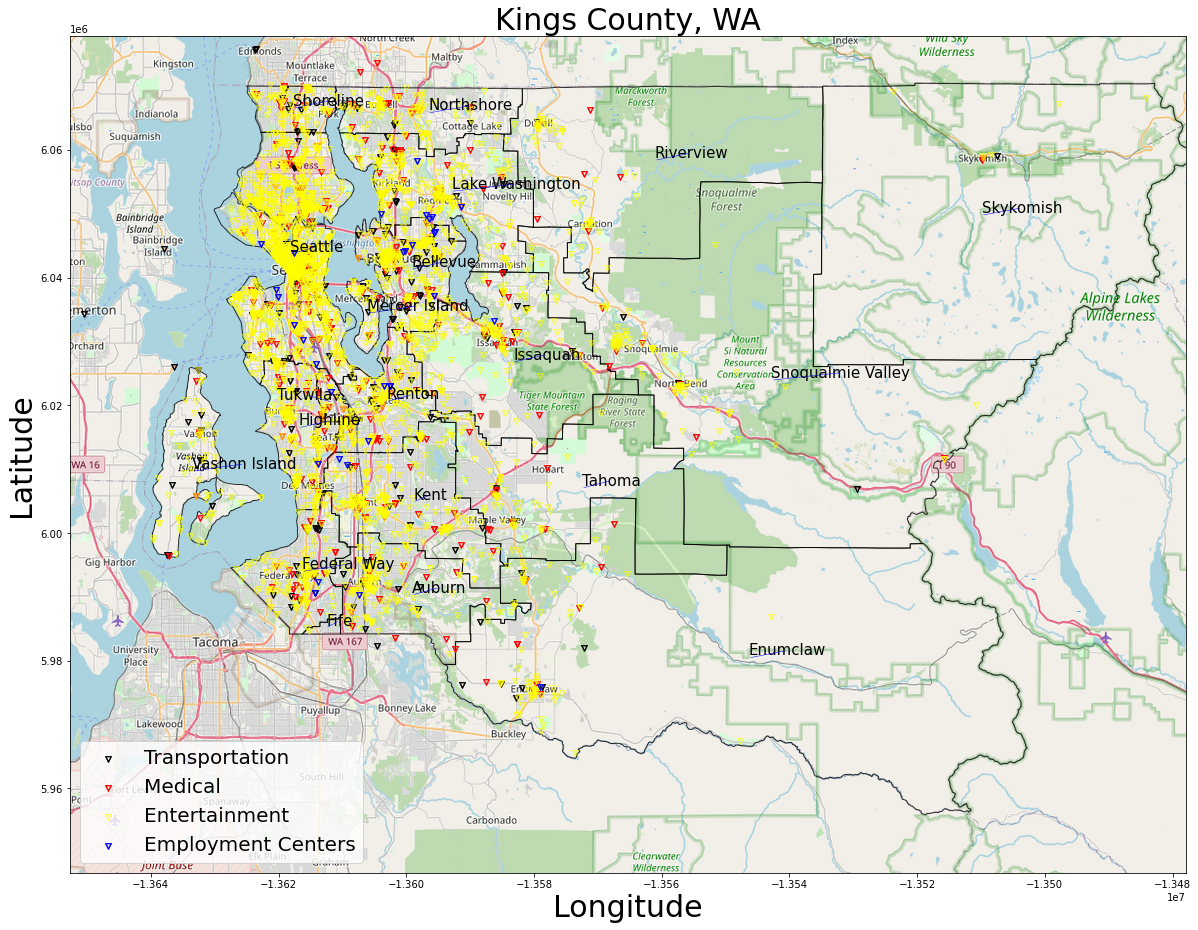

In [76]:
tilemapbase.start_logging()
tilemapbase.init(create=True)
tt_OSM = tilemapbase.tiles.build_OSM()

N, E, S, W = 47.825550, -121.074669, 47.028870, -122.644602
extent = tilemapbase.Extent.from_lonlat(
                longitude_min = W, 
                longitude_max = E,
                latitude_min = S, 
                latitude_max = N)
extent1 = extent.to_project_3857()
fig, ax = plt.subplots(figsize=(20,20)) 
mapbase = tilemapbase.Plotter(extent1, tt_OSM, width=1000).plot(ax)

kings_county.plot(ax=ax, alpha=0.8, edgecolor="black", facecolor="none")
Transportation_cpi_KC.plot(ax=ax, alpha=0.9, color="black", label = 'Transportation', marker='$\\bigtriangledown$')
medical_cpi_KC.plot(ax=ax, alpha=0.9, color="red", label = 'Medical', marker='$\\bigtriangledown$')
entertainment_cpi_KC.plot(ax=ax, alpha=0.5, color="yellow", label = 'Entertainment', marker='$\\bigtriangledown$')
job_cpi_KC.plot(ax=ax, alpha=0.9, color="blue", label = 'Employment Centers', marker='$\\bigtriangledown$')
text = []

for x, y, label in zip(kings_county_points.geometry.x, kings_county_points.geometry.y, kings_county_points['NAME']):
    text.append(plt.text(x, y, label, fontsize = 15))
    
aT.adjust_text(text, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle='-', color='blue', lw=0.5))


plt.legend(prop = {'size':20} )
ax.set_title('Kings County, WA', fontdict = {'fontsize':30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 30})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 30})
plt.show()


In [ ]:
data_kc_poi_sorted = data_kc_poi.sort_values('CODE')
data_kc_poi_sorted.CODE.value_counts()

In [79]:
def plot_map(fig, ax, point_plot, ploygons_plot):
    """A helper function that takes points and polygons as input and creates a plot with a basemap"""
    N, E, S, W = 47.825550, -121.074669, 47.028870, -122.644602
    extent = tilemapbase.Extent.from_lonlat(
                longitude_min = W, 
                longitude_max = E,
                latitude_min = S, 
                latitude_max = N)
    extent1 = extent.to_project_3857()
    plotter = tilemapbase.Plotter(extent1, tt_OSM, width=1000)
    plotter.plot(ax)
    
    ploygons_plot
    point_plot
    
    text = []

    for x, y, label in zip(kings_county_points.geometry.x, kings_county_points.geometry.y, kings_county_points['NAME']):
        text.append(plt.text(x, y, label, fontsize = 15))
    
    aT.adjust_text(text, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle='-', color='blue', lw=0.5))

    ax.set_title('Kings County, WA', fontdict = {'fontsize':30})
    ax.set_ylabel('Latitude',fontdict = {'fontsize': 30})
    ax.set_xlabel('Longitude',fontdict = {'fontsize': 30})
    plt.show()
    #ax.figure.savefig(f'./data/{file_name}.png', bbox_inches='tight')

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


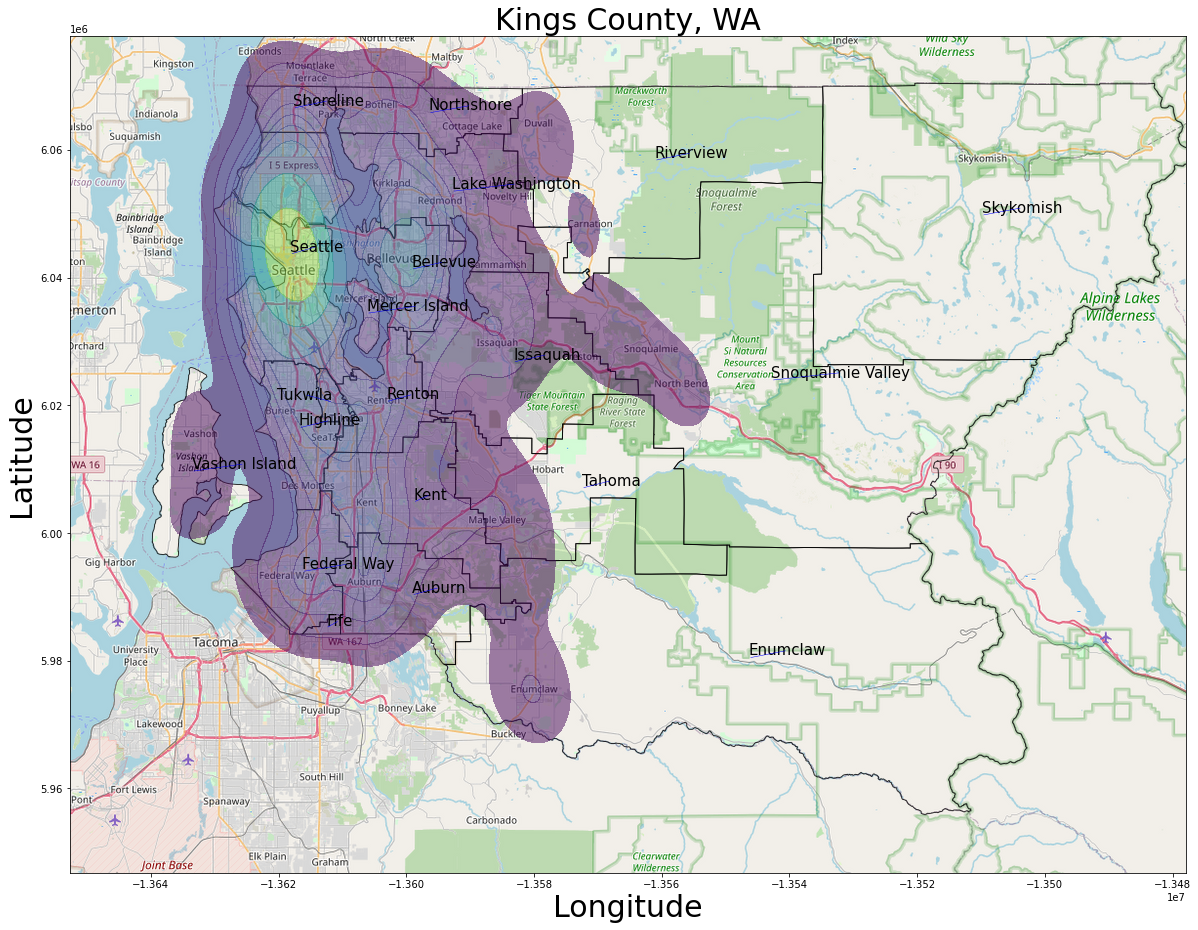

In [80]:
fig, ax = plt.subplots(figsize=(20,20))
density_plot = sns.kdeplot(king_county_CPI["geometry"].x, king_county_CPI["geometry"].y, shade=True, alpha=0.5, cmap='viridis', ax=ax, thresh=0.05, zorder=3)
county_boarders = kings_county.plot(ax=ax, alpha=0.8, edgecolor="black", facecolor="none")
plot_map(fig, ax, density_plot, county_boarders)


In [82]:
xy = np.vstack([king_county_CPI["geometry"].x,king_county_CPI["geometry"].y])
z = gaussian_kde(xy)(xy)

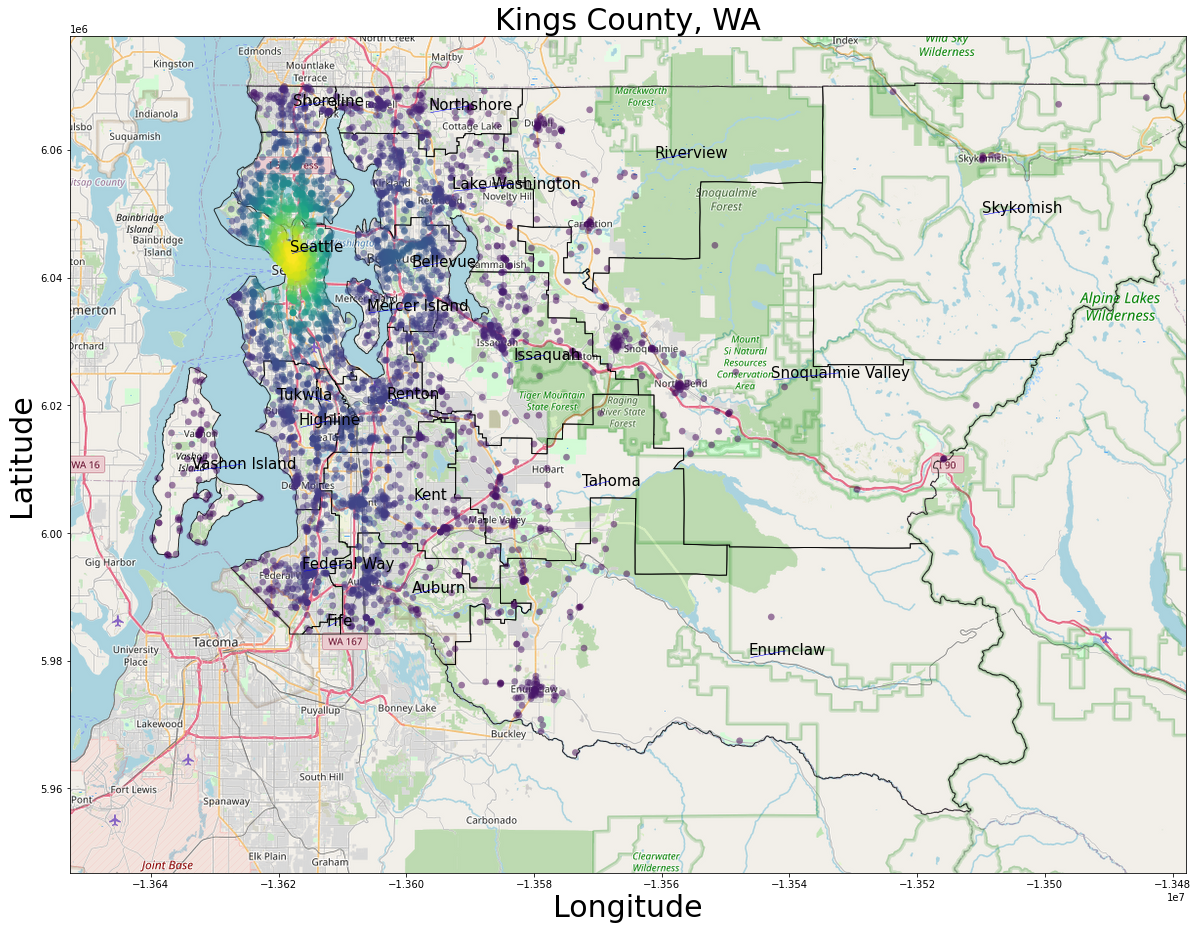

In [83]:
fig, ax = plt.subplots(figsize=(20,20))
density_plot = ax.scatter(king_county_CPI["geometry"].x, king_county_CPI["geometry"].y, c=z, s=45, zorder=2, edgecolor='', alpha=0.5)
county_boarders = kings_county.plot(ax=ax, alpha=0.8, edgecolor="black", facecolor="none")
plot_map(fig, ax, density_plot, county_boarders)

In [68]:
data_kc_poi= pd.read_csv('Common_Points_of_Interest_for_King_County____common_interest_point.csv')


 600 Parks and Recreation *
 390 library 
 60 Non-Government Building
 630 Pier or Terminal +
 350 Food Facility *
 120 Cemetery 
 360 Hotel or Motel
 690 shopping center *
 330 hospital or medical center *
 64 Building-Federal Government 
 570 Park and Ride *
 67 Medic Unit *
 902 Bike Shop
 903 Farmers Market +
 999 General Reference Feature

 62 Building-County Government
 340 Public Health Clinic +
 66 Fire Station *
 63 Renton DSHS 
 480 Museum +
 240 Entertainment and Sports *
 65 Police Station *
 120 Cemetery
 360 hotel 
 66 fire station
 300 golf course +
 420 major employment center or laber *
 510 Other Transportation *
 904 Public Access Farm 
 500 Transit Center *
 30 Airport *
 90 Community Area/Business Center +

In [42]:
# Common place of interest that this model will use for the feature

entertainment = {600:'Parks and Recreation', 690: 'Shopping Center', 240: 'Entertainment and Sports',
 350: 'Food Facility'}
transportation = {510: 'Other Transportation',500: 'Transit Center', 30: 'Airport',  570: 'Park and Ride'}
Medical_emergency = {330: 'Hostpital or Medical Center', 67: 'Medic Unit',66: 'Fire Station', 65: 'Police Station' }
employment_center = {420: 'Major Employment Center or Laber'}            


# Create 1 mile radius around each X,Y
# see what cpi is within those radius
#


In [69]:
geo_data_j = geo_data_j.to_crs(epsg=3857)

# School Sites 

In [43]:
kings_county_schools

OBJECTID  FEATURE_ID    ESITE  CODE                               NAME  \
0           1         207       80   662              Sammamish High School   
1           2         263      113   660      Saint Brendan Catholic School   
2           3         884   527409   660    Highland Park Elementary School   
3           4         475     8634   660         Lakeview Elementary School   
4           5        1093    12282   662            Nathan Hale High School   
..        ...         ...      ...   ...                                ...   
637       638         245   178050   662                Bothell High School   
638       639         850   266898   660                 The Perkins School   
639       640     6600723  1144445   663  Green River College Auburn Center   
640       641    10000048  1000553   666          Muckleshoot Tribal School   
641       642    10000049   806841   663         Muckleshoot Tribal College   

                  ABB_NAME                        ADDRESS ZIPCODE    LONG_CEN  \
0                Sammamish               100 140th Ave SE   98005 -122.152305   
1            Saint Brendan              10049 NE 195th St   98011 -122.205416   
2            Highland Park             1012 SW Trenton St   98106 -122.348456   
3                 Lakeview               10400 NE 68th St   98033 -122.200171   
4              Nathan Hale              10750 30th Ave NE   98125 -122.294728   
..                     ...                            ...     ...         ...   
637                Bothell               9130 NE 180th St   98011 -122.218848   
638                Perkins          9005 Roosevelt Way NE   98115 -122.318018   
639  Green R Coll - Auburn                   1221 D St NE   98002 -122.225133   
640     Muckleshoot Tribal              15209 SE 376th St   98092 -122.138098   
641     Muckleshoot Tribal  39811 Auburn-Enumclaw Road SE   98092 -122.116470   

       LAT_CEN  SCH_CLASS         DISTRICT         PIN   MAJOR MINOR  \
0    47.608458       10.0         BELLEVUE  3425059019  342505  9019   
1    47.768905       20.0       NORTHSHORE  0526059084  052605  9084   
2    47.525263       10.0          SEATTLE  7972603210  797260  3210   
3    47.667242       10.0  LAKE WASHINGTON  7882600132  788260  0132   
4    47.708040       10.0          SEATTLE  2826049152  282604  9152   
..         ...        ...              ...         ...     ...   ...   
637  47.759858       10.0       NORTHSHORE  0726059016  072605  9016   
638  47.694271       20.0          SEATTLE  5100402704  510040  2704   
639  47.318563        NaN             None        None    None  None   
640  47.264255       20.0           AUBURN  3521059064  352105  9064   
641  47.244476       20.0           AUBURN  0220059089  022005  9089   

                       FEATUREDES  OSPI_CODE  \
0                     School-High     3282.0   
1               School-Elementary        0.0   
2               School-Elementary     2269.0   
3               School-Elementary     3041.0   
4                     School-High     3479.0   
..                            ...        ...   
637                   School-High     3106.0   
638             School-Elementary        0.0   
639  School-College or University        NaN   
640                   School-K-12        0.0   
641  School-College or University        0.0   

                              geometry  
0    POINT (-13597932.153 6041962.064)  
1    POINT (-13603844.543 6068494.851)  
2    POINT (-13619767.638 6028236.149)  
3    POINT (-13603260.682 6051673.638)  
4    POINT (-13613786.701 6058420.159)  
..                                 ...  
637  POINT (-13605339.784 6066996.738)  
638  POINT (-13616379.365 6056142.551)  
639  POINT (-13606039.235 5994227.851)  
640  POINT (-13596350.431 5985314.731)  
641  POINT (-13593942.875 5982070.862)  

[642 rows x 18 columns]

In [84]:
kings_county_schools.columns= kings_county_schools.columns.str.lower()
kings_county_schools.head()

objectid  feature_id   esite  code                             name  \
0         1         207      80   662            Sammamish High School   
1         2         263     113   660    Saint Brendan Catholic School   
2         3         884  527409   660  Highland Park Elementary School   
3         4         475    8634   660       Lakeview Elementary School   
4         5        1093   12282   662          Nathan Hale High School   

        abb_name             address zipcode    long_cen    lat_cen  \
0      Sammamish    100 140th Ave SE   98005 -122.152305  47.608458   
1  Saint Brendan   10049 NE 195th St   98011 -122.205416  47.768905   
2  Highland Park  1012 SW Trenton St   98106 -122.348456  47.525263   
3       Lakeview    10400 NE 68th St   98033 -122.200171  47.667242   
4    Nathan Hale   10750 30th Ave NE   98125 -122.294728  47.708040   

   sch_class         district         pin   major minor         featuredes  \
0       10.0         BELLEVUE  3425059019  342505  9019        School-High   
1       20.0       NORTHSHORE  0526059084  052605  9084  School-Elementary   
2       10.0          SEATTLE  7972603210  797260  3210  School-Elementary   
3       10.0  LAKE WASHINGTON  7882600132  788260  0132  School-Elementary   
4       10.0          SEATTLE  2826049152  282604  9152        School-High   

   ospi_code                           geometry  
0     3282.0  POINT (-13597932.153 6041962.064)  
1        0.0  POINT (-13603844.543 6068494.851)  
2     2269.0  POINT (-13619767.638 6028236.149)  
3     3041.0  POINT (-13603260.682 6051673.638)  
4     3479.0  POINT (-13613786.701 6058420.159)

In [86]:
kings_county_schools['district']= kings_county_schools['district'].str.lower()

In [89]:
seattle = kings_county_schools.loc[kings_county_schools['district'] == 'seattle']
seattle

objectid  feature_id   esite  code                              name  \
2           3         884  527409   660   Highland Park Elementary School   
4           5        1093   12282   662           Nathan Hale High School   
10         11     6600134  269619   661  Robert Eagle Staff Middle School   
12         13         950  425772   660         Stevens Elementary School   
22         23        1099  248792   660   Olympic Hills Elementary School   
..        ...         ...     ...   ...                               ...   
618       619         940  426089   660        McGilvra Elementary School   
633       634     6600653  336421   661            Billings Middle School   
634       635         969  346015   660   Northwest Montessori - Wedgwood   
635       636     6600700  350419   664  Thornton Creek Elementary School   
638       639         850  266898   660                The Perkins School   

                 abb_name                address zipcode    long_cen  \
2           Highland Park     1012 SW Trenton St   98106 -122.348456   
4             Nathan Hale      10750 30th Ave NE   98125 -122.294728   
10     Robert Eagle Staff         1330 N 90th St   98103 -122.340486   
12                Stevens        1242 18th Ave E   98112 -122.308029   
22          Olympic Hills      13018 20th Ave NE   98125 -122.306858   
..                    ...                    ...     ...         ...   
618              McGilvra        1617 38th Ave E   98112 -122.284833   
633              Billings   7217 Woodlawn Ave NE   98115 -122.325225   
634  Northwest Montessori       7400 25th Ave NE   98115 -122.300337   
635        Thornton Creek       7711 43rd Ave NE   98115 -122.282824   
638               Perkins  9005 Roosevelt Way NE   98115 -122.318018   

       lat_cen  sch_class district         pin   major minor  \
2    47.525263       10.0  seattle  7972603210  797260  3210   
4    47.708040       10.0  seattle  2826049152  282604  9152   
10   47.695103       10.0  seattle  3126049064  312604  9064   
12   47.631930       10.0  seattle  1337801270  133780  1270   
22   47.724054       10.0  seattle  2126049041  212604  9041   
..         ...        ...      ...         ...     ...   ...   
618  47.634076       10.0  seattle  5318100820  531810  0820   
633  47.680886       20.0  seattle  9529100040  952910  0040   
634  47.682235       20.0  seattle  9215400110  921540  0110   
635  47.685574       10.0  seattle  6392002430  639200  2430   
638  47.694271       20.0  seattle  5100402704  510040  2704   

                    featuredes  ospi_code                           geometry  
2            School-Elementary     2269.0  POINT (-13619767.638 6028236.149)  
4                  School-High     3479.0  POINT (-13613786.701 6058420.159)  
10   School-Junior High/Middle        0.0  POINT (-13618880.410 6056280.166)  
12           School-Elementary     2080.0  POINT (-13615267.302 6045838.335)  
22           School-Elementary     2976.0  POINT (-13615136.974 6061069.656)  
..                         ...        ...                                ...  
618          School-Elementary     2201.0  POINT (-13612685.152 6046192.875)  
633  School-Junior High/Middle        0.0  POINT (-13617181.568 6053929.207)  
634          School-Elementary        0.0  POINT (-13614411.032 6054152.201)  
635         School-Alternative        NaN  POINT (-13612461.525 6054704.317)  
638          School-Elementary        0.0  POINT (-13616379.365 6056142.551)  

[183 rows x 18 columns]

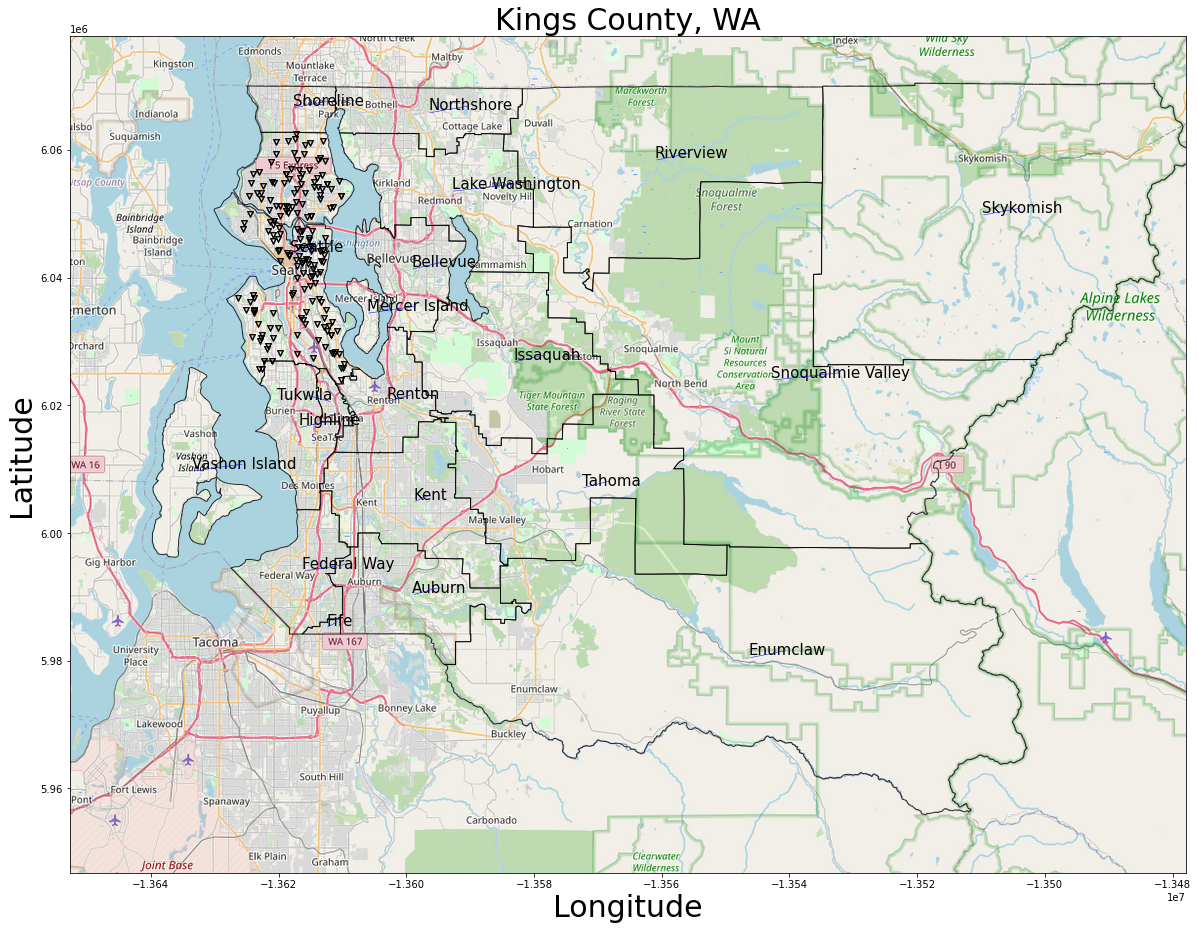

In [90]:
fig, ax = plt.subplots(figsize=(20,20))
seattle.plot(ax=ax, alpha=0.9, color="black", label = 'seattle', marker='$\\bigtriangledown$')
county_boarders = kings_county.plot(ax=ax, alpha=0.8, edgecolor="black", facecolor="none")
plot_map(fig, ax, seattle, county_boarders)


In [44]:
kings_county

OBJECTID SCHDST               NAME DSTNUM     Shape_Leng    Shape_Area  \
0          1      1            Seattle  17001  435348.243737  2.570049e+09   
1          2    210        Federal Way  17210  174555.620159  1.002917e+09   
2          3    216           Enumclaw  17216  735641.958121  1.264371e+10   
3          4    400      Mercer Island  17400   76961.896481  1.757027e+08   
4          5    401           Highline  17401  162866.561537  8.690626e+08   
5          6    402      Vashon Island  17402  273923.139400  1.018205e+09   
6          7    403             Renton  17403  206065.171372  9.013959e+08   
7          8    404          Skykomish  17404  462386.816586  1.062463e+10   
8          9    405           Bellevue  17405  197777.252506  9.332731e+08   
9         10    406            Tukwila  17406   79789.132651  1.561630e+08   
10        11    407          Riverview  17407  371166.444490  4.983048e+09   
11        12    408             Auburn  17408  250125.273440  1.571912e+09   
12        13    409             Tahoma  17409  434909.066661  3.385657e+09   
13        14    410  Snoqualmie Valley  17410  693010.784019  1.097333e+10   
14        15    411           Issaquah  17411  327163.134675  2.854883e+09   
15        16    412          Shoreline  17412   90993.440436  4.273791e+08   
16        17    414    Lake Washington  17414  309811.102251  1.918861e+09   
17        18    415               Kent  17415  266355.595532  1.919151e+09   
18        19    417         Northshore  17417  188908.404350  1.062970e+09   
19        20    888               Fife  27417   36310.948404  4.739885e+07   

                                             geometry  
0   MULTIPOLYGON (((-13625866.192 6051529.654, -13...  
1   POLYGON ((-13613323.723 6006580.167, -13613304...  
2   POLYGON ((-13564166.545 5998910.769, -13564177...  
3   POLYGON ((-13608223.062 6039906.453, -13608208...  
4   POLYGON ((-13620889.178 6026631.475, -13620887...  
5   POLYGON ((-13633665.482 6025905.008, -13633634...  
6   POLYGON ((-13602451.963 6032202.877, -13602441...  
7   POLYGON ((-13517715.684 6070411.595, -13515370...  
8   POLYGON ((-13604923.990 6049329.340, -13604923...  
9   POLYGON ((-13611223.376 6023770.578, -13611199...  
10  POLYGON ((-13575599.930 6069774.824, -13575262...  
11  POLYGON ((-13607172.249 6000001.553, -13607134...  
12  POLYGON ((-13569592.198 6021717.136, -13569295...  
13  POLYGON ((-13545840.451 6054884.979, -13545552...  
14  POLYGON ((-13588898.748 6040903.296, -13588864...  
15  POLYGON ((-13620353.719 6069963.758, -13620347...  
16  POLYGON ((-13608273.494 6062352.036, -13608273...  
17  POLYGON ((-13594528.154 6017789.068, -13594538...  
18  POLYGON ((-13608885.485 6069843.810, -13608860...  
19  POLYGON ((-13612359.903 5986520.430, -13612229...

In [ ]:
data_kc_schsite= pd.read_csv('School_Sites_in_King_County___schsite_point.csv')
data_kc_schsite.head()

In [7]:
data_kc_schsite.columns= data_kc_schsite.columns.str.lower()
data_kc_schsite.head()

x          y  objectid  feature_id   esite  code  \
0 -122.152303  47.608461         1         207      80   662   
1 -122.205415  47.768906         2         263     113   660   
2 -122.348454  47.525265         3         884  527409   660   
3 -122.200170  47.667245         4         475    8634   660   
4 -122.294727  47.708042         5        1093   12282   662   

                              name       abb_name             address  \
0            Sammamish High School      Sammamish    100 140th Ave SE   
1    Saint Brendan Catholic School  Saint Brendan   10049 NE 195th St   
2  Highland Park Elementary School  Highland Park  1012 SW Trenton St   
3       Lakeview Elementary School       Lakeview    10400 NE 68th St   
4          Nathan Hale High School    Nathan Hale   10750 30th Ave NE   

   zipcode    long_cen    lat_cen  sch_class         district           pin  \
0    98005 -122.152304  47.608458       10.0         BELLEVUE  3.425059e+09   
1    98011 -122.205416  47.768905       20.0       NORTHSHORE  5.260591e+08   
2    98106 -122.348456  47.525263       10.0          SEATTLE  7.972603e+09   
3    98033 -122.200171  47.667242       10.0  LAKE WASHINGTON  7.882600e+09   
4    98125 -122.294728  47.708040       10.0          SEATTLE  2.826049e+09   

      major   minor         featuredes  ospi_code  
0  342505.0  9019.0        School-High     3282.0  
1   52605.0  9084.0  School-Elementary        0.0  
2  797260.0  3210.0  School-Elementary     2269.0  
3  788260.0   132.0  School-Elementary     3041.0  
4  282604.0  9152.0        School-High     3479.0

In [8]:
data_kc_schsite['district']= data_kc_schsite['district'].str.lower()

In [9]:
data_kc_schsite.dropna(subset=['district'], inplace=True)
data_kc_schsite.isnull().sum()

x              0
y              0
objectid       0
feature_id     0
esite          0
code           0
name           0
abb_name       0
address        0
zipcode        0
long_cen       0
lat_cen        0
sch_class      0
district       0
pin            0
major          0
minor          0
featuredes     0
ospi_code     35
dtype: int64

In [10]:
data_schsite = data_kc_schsite.loc[:, ['zipcode', 'long_cen', 'lat_cen', 'district', 'featuredes']]
data_schsite_list = data_schsite['district'].unique().tolist()

In [11]:
data_schsite_list

['bellevue',
 'northshore',
 'seattle',
 'lake washington',
 'highline',
 'renton',
 'snoqualmie valley',
 'auburn',
 'kent',
 'federal way',
 'enumclaw',
 'issaquah',
 'shoreline',
 'tahoma',
 'vashon island',
 'riverview',
 'mercer island',
 'tukwila',
 'skykomish']

In [12]:
data_schsite.groupby('district').count()['zipcode']

district
auburn                33
bellevue              48
enumclaw              10
federal way           44
highline              44
issaquah              30
kent                  44
lake washington       64
mercer island         12
northshore            31
renton                30
riverview              8
seattle              183
shoreline             25
skykomish              1
snoqualmie valley     12
tahoma                11
tukwila                6
vashon island          5
Name: zipcode, dtype: int64

In [13]:
district_zip = {}

for i in range(len(data_schsite_list)):
    x = data_schsite_list[i]
    district_zip[x] = data_schsite.loc[data_schsite['district'] == x].sort_values(['zipcode']).zipcode.unique().tolist()


In [14]:
district_zip

{'bellevue': [98004, 98005, 98006, 98007, 98008, 98039, 98121],
 'northshore': [98011, 98028, 98052, 98072, 98077],
 'seattle': [98101,
  98102,
  98103,
  98104,
  98105,
  98106,
  98107,
  98108,
  98109,
  98112,
  98115,
  98116,
  98117,
  98118,
  98119,
  98121,
  98122,
  98125,
  98126,
  98133,
  98134,
  98136,
  98144,
  98146,
  98177,
  98178,
  98195,
  98199],
 'lake washington': [98028, 98033, 98034, 98052, 98053, 98074, 98077],
 'highline': [98146, 98148, 98166, 98168, 98188, 98198],
 'renton': [98055, 98056, 98057, 98058, 98059, 98178],
 'snoqualmie valley': [98024, 98045, 98065],
 'auburn': [98001, 98002, 98047, 98092],
 'kent': [98010, 98030, 98031, 98032, 98042, 98058, 98198],
 'federal way': [98001, 98003, 98023, 98032, 98198],
 'enumclaw': [98010, 98022],
 'issaquah': [98006, 98008, 98027, 98029, 98059, 98065, 98075],
 'shoreline': [98133, 98155, 98177],
 'tahoma': [98038, 98042, 98051],
 'vashon island': [98070],
 'riverview': [98014, 98019],
 'mercer island':

In [15]:
for key in district_zip:
    if 98168 in district_zip[key]:
        print(key)

highline
tukwila


In [16]:
df_district_zip = pd.DataFrame(list(district_zip.items()),columns = ['district','zipcode']) 
df_district_zip

district                                            zipcode
0            bellevue  [98004, 98005, 98006, 98007, 98008, 98039, 98121]
1          northshore                [98011, 98028, 98052, 98072, 98077]
2             seattle  [98101, 98102, 98103, 98104, 98105, 98106, 981...
3     lake washington  [98028, 98033, 98034, 98052, 98053, 98074, 98077]
4            highline         [98146, 98148, 98166, 98168, 98188, 98198]
5              renton         [98055, 98056, 98057, 98058, 98059, 98178]
6   snoqualmie valley                              [98024, 98045, 98065]
7              auburn                       [98001, 98002, 98047, 98092]
8                kent  [98010, 98030, 98031, 98032, 98042, 98058, 98198]
9         federal way                [98001, 98003, 98023, 98032, 98198]
10           enumclaw                                     [98010, 98022]
11           issaquah  [98006, 98008, 98027, 98029, 98059, 98065, 98075]
12          shoreline                              [98133, 98155, 98177]
13             tahoma                              [98038, 98042, 98051]
14      vashon island                                            [98070]
15          riverview                                     [98014, 98019]
16      mercer island                                            [98040]
17            tukwila                                     [98168, 98188]
18          skykomish                                            [98288]

In [17]:
kc_sch_district_grades = pd.read_csv('King_County_Sch_District_Grades.csv')
kc_sch_district_grades = kc_sch_district_grades.drop('Unnamed: 0', axis=1)
kc_sch_district_grades

district grade  total_sch total_student
0        mercer island    A+          6         4,522
1             bellevue    A+         31        21,609
2      lake washington    A+         55        30,675
3             issaquah    A+         27        20,897
4               tahoma     A          9         8,906
5            shoreline     A         19         9,899
6        vashon island     A          5         1,585
7    snoqualmie valley    A-         13         7,214
8              seattle    A-        108        55,271
9            riverview    B+          9         3,482
10              auburn     B         24        17,505
11            enumclaw     B         10         4,183
12           skykomish     B          2            57
13                kent     B         44        27,291
14              renton    B-         29        16,425
15         federal way    C+         46        23,489
16            highline    C+         40        19,213
17             tukwila    C+          8         3,046
18  muckleshoot tribal    D+          1           492

In [18]:
# Missing district Northshore
north_shore = {'district': ['northshore'], 
               'grade': ['A'],
               'total_sch': ['39'],
               'total_student': ['23500']}
df_ns = pd.DataFrame(north_shore, columns = ['district','grade', 'total_sch', 'total_student'])
df_ns

district grade total_sch total_student
0  northshore     A        39         23500

In [19]:
kc_sch_district_grades = pd.concat([kc_sch_district_grades,df_ns])
kc_sch_district_grades

district grade total_sch total_student
0        mercer island    A+         6         4,522
1             bellevue    A+        31        21,609
2      lake washington    A+        55        30,675
3             issaquah    A+        27        20,897
4               tahoma     A         9         8,906
5            shoreline     A        19         9,899
6        vashon island     A         5         1,585
7    snoqualmie valley    A-        13         7,214
8              seattle    A-       108        55,271
9            riverview    B+         9         3,482
10              auburn     B        24        17,505
11            enumclaw     B        10         4,183
12           skykomish     B         2            57
13                kent     B        44        27,291
14              renton    B-        29        16,425
15         federal way    C+        46        23,489
16            highline    C+        40        19,213
17             tukwila    C+         8         3,046
18  muckleshoot tribal    D+         1           492
0           northshore     A        39         23500

In [20]:
kc_school_district = kc_sch_district_grades.join(df_district_zip.set_index('district'), on='district')
kc_school_district

district grade total_sch total_student  \
0        mercer island    A+         6         4,522   
1             bellevue    A+        31        21,609   
2      lake washington    A+        55        30,675   
3             issaquah    A+        27        20,897   
4               tahoma     A         9         8,906   
5            shoreline     A        19         9,899   
6        vashon island     A         5         1,585   
7    snoqualmie valley    A-        13         7,214   
8              seattle    A-       108        55,271   
9            riverview    B+         9         3,482   
10              auburn     B        24        17,505   
11            enumclaw     B        10         4,183   
12           skykomish     B         2            57   
13                kent     B        44        27,291   
14              renton    B-        29        16,425   
15         federal way    C+        46        23,489   
16            highline    C+        40        19,213   
17             tukwila    C+         8         3,046   
18  muckleshoot tribal    D+         1           492   
0           northshore     A        39         23500   

                                              zipcode  
0                                             [98040]  
1   [98004, 98005, 98006, 98007, 98008, 98039, 98121]  
2   [98028, 98033, 98034, 98052, 98053, 98074, 98077]  
3   [98006, 98008, 98027, 98029, 98059, 98065, 98075]  
4                               [98038, 98042, 98051]  
5                               [98133, 98155, 98177]  
6                                             [98070]  
7                               [98024, 98045, 98065]  
8   [98101, 98102, 98103, 98104, 98105, 98106, 981...  
9                                      [98014, 98019]  
10                       [98001, 98002, 98047, 98092]  
11                                     [98010, 98022]  
12                                            [98288]  
13  [98010, 98030, 98031, 98032, 98042, 98058, 98198]  
14         [98055, 98056, 98057, 98058, 98059, 98178]  
15                [98001, 98003, 98023, 98032, 98198]  
16         [98146, 98148, 98166, 98168, 98188, 98198]  
17                                     [98168, 98188]  
18                                                NaN  
0                 [98011, 98028, 98052, 98072, 98077]

In [21]:
grade_rank= {'grade': ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F'],
             'grade_num': [13,12,11,10,9,8,7,6,5,4,3,2,1]}
df_grade_rank = pd.DataFrame(grade_rank, columns = ['grade','grade_num'])
df_grade_rank

grade  grade_num
0     A+         13
1      A         12
2     A-         11
3     B+         10
4      B          9
5     B-          8
6     C+          7
7      C          6
8     C-          5
9     D+          4
10     D          3
11    D-          2
12     F          1

In [22]:
kc_school_district = kc_school_district.join(df_grade_rank.set_index('grade'), on='grade')
kc_school_district

district grade total_sch total_student  \
0        mercer island    A+         6         4,522   
1             bellevue    A+        31        21,609   
2      lake washington    A+        55        30,675   
3             issaquah    A+        27        20,897   
4               tahoma     A         9         8,906   
5            shoreline     A        19         9,899   
6        vashon island     A         5         1,585   
7    snoqualmie valley    A-        13         7,214   
8              seattle    A-       108        55,271   
9            riverview    B+         9         3,482   
10              auburn     B        24        17,505   
11            enumclaw     B        10         4,183   
12           skykomish     B         2            57   
13                kent     B        44        27,291   
14              renton    B-        29        16,425   
15         federal way    C+        46        23,489   
16            highline    C+        40        19,213   
17             tukwila    C+         8         3,046   
18  muckleshoot tribal    D+         1           492   
0           northshore     A        39         23500   

                                              zipcode  grade_num  
0                                             [98040]         13  
1   [98004, 98005, 98006, 98007, 98008, 98039, 98121]         13  
2   [98028, 98033, 98034, 98052, 98053, 98074, 98077]         13  
3   [98006, 98008, 98027, 98029, 98059, 98065, 98075]         13  
4                               [98038, 98042, 98051]         12  
5                               [98133, 98155, 98177]         12  
6                                             [98070]         12  
7                               [98024, 98045, 98065]         11  
8   [98101, 98102, 98103, 98104, 98105, 98106, 981...         11  
9                                      [98014, 98019]         10  
10                       [98001, 98002, 98047, 98092]          9  
11                                     [98010, 98022]          9  
12                                            [98288]          9  
13  [98010, 98030, 98031, 98032, 98042, 98058, 98198]          9  
14         [98055, 98056, 98057, 98058, 98059, 98178]          8  
15                [98001, 98003, 98023, 98032, 98198]          7  
16         [98146, 98148, 98166, 98168, 98188, 98198]          7  
17                                     [98168, 98188]          7  
18                                                NaN          4  
0                 [98011, 98028, 98052, 98072, 98077]         12

In [23]:
kc_school_district.sort_values(by='grade_num', ascending=False, inplace=True)

In [26]:
kc_school_district.reset_index(inplace=True, drop=True)
kc_school_district.drop('index', axis=1, inplace=True)

In [28]:
kc_school_district

district grade total_sch total_student  \
0        mercer island    A+         6         4,522   
1      lake washington    A+        55        30,675   
2             issaquah    A+        27        20,897   
3             bellevue    A+        31        21,609   
4        vashon island     A         5         1,585   
5           northshore     A        39         23500   
6            shoreline     A        19         9,899   
7               tahoma     A         9         8,906   
8    snoqualmie valley    A-        13         7,214   
9              seattle    A-       108        55,271   
10           riverview    B+         9         3,482   
11            enumclaw     B        10         4,183   
12           skykomish     B         2            57   
13                kent     B        44        27,291   
14              auburn     B        24        17,505   
15              renton    B-        29        16,425   
16         federal way    C+        46        23,489   
17            highline    C+        40        19,213   
18             tukwila    C+         8         3,046   
19  muckleshoot tribal    D+         1           492   

                                              zipcode  grade_num  
0                                             [98040]         13  
1   [98028, 98033, 98034, 98052, 98053, 98074, 98077]         13  
2   [98006, 98008, 98027, 98029, 98059, 98065, 98075]         13  
3   [98004, 98005, 98006, 98007, 98008, 98039, 98121]         13  
4                                             [98070]         12  
5                 [98011, 98028, 98052, 98072, 98077]         12  
6                               [98133, 98155, 98177]         12  
7                               [98038, 98042, 98051]         12  
8                               [98024, 98045, 98065]         11  
9   [98101, 98102, 98103, 98104, 98105, 98106, 981...         11  
10                                     [98014, 98019]         10  
11                                     [98010, 98022]          9  
12                                            [98288]          9  
13  [98010, 98030, 98031, 98032, 98042, 98058, 98198]          9  
14                       [98001, 98002, 98047, 98092]          9  
15         [98055, 98056, 98057, 98058, 98059, 98178]          8  
16                [98001, 98003, 98023, 98032, 98198]          7  
17         [98146, 98148, 98166, 98168, 98188, 98198]          7  
18                                     [98168, 98188]          7  
19                                                NaN          4

In [55]:
kc_school_district.zipcode[0]

[98040]

In [29]:
kc_school_district.to_csv('kc_school_district.csv')

In [30]:
def district(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                district = kc_school_district['district'][key]
    except Exception:
        pass
    return district

In [31]:
def districts(zipcodes):
    try:
        x = district(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [32]:
district_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    district_KC.append(districts(zipcode))

In [33]:
def grade(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade = kc_school_district['grade'][key]
    except Exception:
        pass
    return grade

In [34]:
def grades(zipcodes):
    try:
        x = grade(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [35]:
grades_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    grades_KC.append(grades(zipcode))

In [36]:
def total_sch(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_sch = kc_school_district['total_sch'][key]
    except Exception:
        pass
    return total_sch

In [37]:
def total_schs(zipcodes):
    try:
        x = total_sch(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [38]:
total_schs_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    total_schs_KC.append(total_schs(zipcode))

In [39]:
def total_student(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_student = kc_school_district['total_student'][key]
    except Exception:
        pass
    return total_student

In [40]:
def total_students(zipcodes):
    try:
        x = total_student(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [41]:
total_student_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    total_student_KC.append(total_students(zipcode))

In [42]:
def grade_num(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade_num = kc_school_district['grade_num'][key]
    except Exception:
        pass
    return grade_num

In [43]:
def grade_nums(zipcodes):
    try:
        x = grade_num(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [44]:
grade_nums_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    grade_nums_KC.append(grade_nums(zipcode))

In [45]:
x = {'district': district_KC, 
     'grade': grades_KC,
     'grade_num': grade_nums_KC,
     'total_sch': total_schs_KC,
     'total_student': total_student_KC} 

In [46]:
df_poi_school = pd.DataFrame(x, columns = ['district','grade','grade_num','total_sch','total_student'])
df_poi_school

district grade  grade_num total_sch total_student
0           tukwila    C+          7         8         3,046
1           seattle    A-         11       108        55,271
2              kent     B          9        44        27,291
3         riverview    B+         10         9         3,482
4           tukwila    C+          7         8         3,046
...             ...   ...        ...       ...           ...
6486     northshore     A         12        39         23500
6487        seattle    A-         11       108        55,271
6488        seattle    A-         11       108        55,271
6489  vashon island     A         12         5         1,585
6490         auburn     B          9        24        17,505

[6491 rows x 5 columns]

In [48]:
data_kc_poi = pd.concat([data_kc_poi, df_poi_school], axis=1)

In [49]:
data_kc_poi

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0    -122.286944  47.499985         1     6002948       0.0   600   
1    -122.305465  47.635532         2         828       0.0   600   
2    -122.211064  47.405961         3         374       0.0   600   
3    -121.912156  47.650466         4        1891  124849.0   390   
4    -122.295038  47.441348         5        1817  401027.0    60   
...          ...        ...       ...         ...       ...   ...   
6486 -122.112514  47.669697      6487        2292  354427.0   530   
6487 -122.378333  47.643655      6488     6007226       0.0   600   
6488 -122.336448  47.615441      6489        1691  835568.0    60   
6489 -122.459065  47.451750      6490         772       0.0   600   
6490 -122.229269  47.308529      6491          22  717584.0   330   

                                    NAME                            ABB_NAME  \
0       Green River Trail Site - Tukwila    Green River Trail Site - Tukwila   
1                        Interlaken Park                     Interlaken Park   
2                    Garrison Creek Park                 Garrison Creek Park   
3                      Carnation Library                       Carnation Lib   
4                  Sea-Tac Office Center               Sea-Tac Office Center   
...                                  ...                                 ...   
6486  Bartell Drugs-Redmond Towne Center  Bartell Drugs-Redmond Towne Center   
6487                       Interbay Golf                       Interbay Golf   
6488                           Love Bldg                           Love Bldg   
6489                           Ober Park                           Ober Park   
6490     MultiCare Auburn Medical Center     MultiCare Auburn Medical Center   

                                                ADDRESS  ZIPCODE  \
0     27th Ave S and S 112th St to 69th Ave S and S ...    98188   
1                           Interlaken Pl & Delmar Dr E    98102   
2                               S 218th St & 98th Ave S    98031   
3                                        4804 Tolt  Ave    98014   
4                                   18000 Pacific Hwy S    98188   
...                                                 ...      ...   
6486                                  7370 170th Ave NE    98052   
6487                                    2501 15th Ave W    98119   
6488                                       1925 8th Ave    98101   
6489                                17100 Vashon Hwy SW    98070   
6490                                  202 N Division St    98002   

           district grade  grade_num total_sch total_student  
0           tukwila    C+          7         8         3,046  
1           seattle    A-         11       108        55,271  
2              kent     B          9        44        27,291  
3         riverview    B+         10         9         3,482  
4           tukwila    C+          7         8         3,046  
...             ...   ...        ...       ...           ...  
6486     northshore     A         12        39         23500  
6487        seattle    A-         11       108        55,271  
6488        seattle    A-         11       108        55,271  
6489  vashon island     A         12         5         1,585  
6490         auburn     B          9        24        17,505  

[6491 rows x 15 columns]

Text(0.5, 310.3034246844864, 'Longitude')

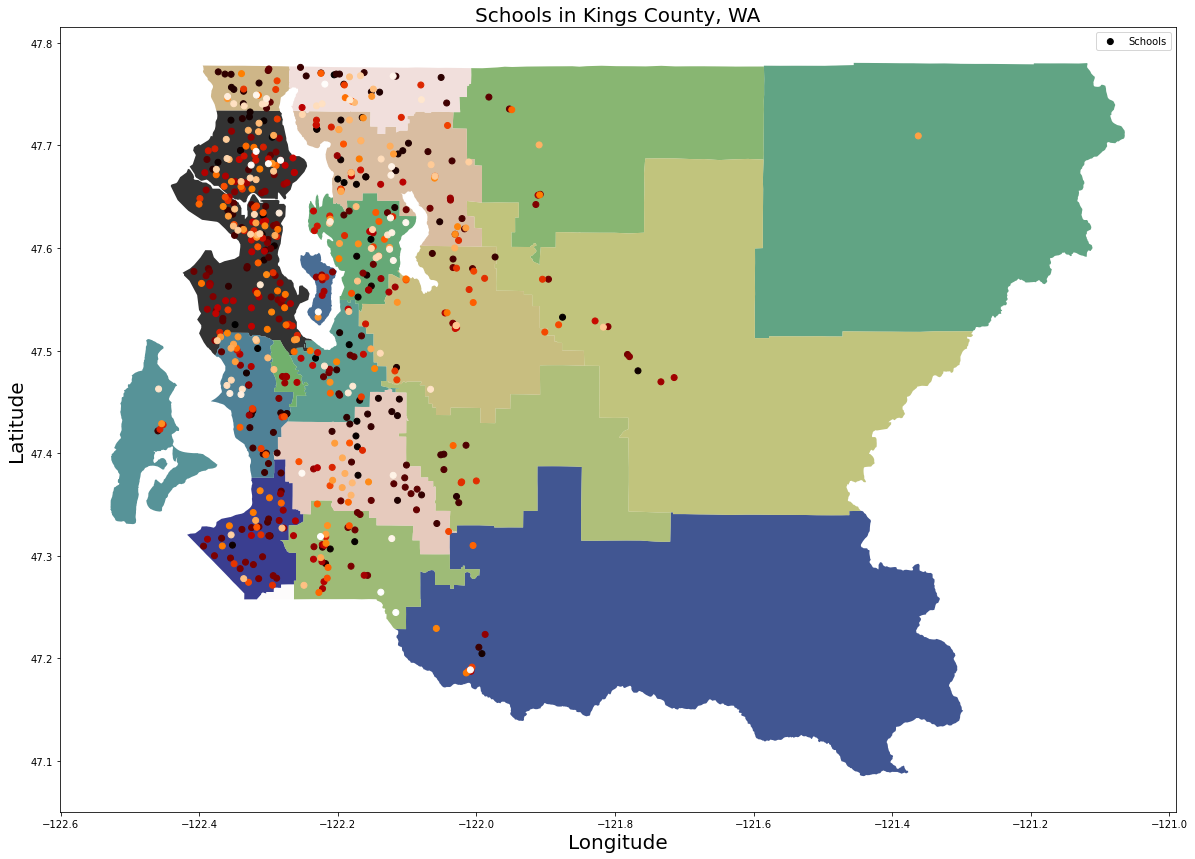

In [50]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
kings_county_schools.plot(ax=ax, cmap = 'gist_heat', label = 'Schools')

plt.legend(prop = {'size':10} )
ax.set_title('Schools in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})